<a href="https://colab.research.google.com/github/sheng-999/CSR/blob/upload/Environmental_Impact_of_Food_Production_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 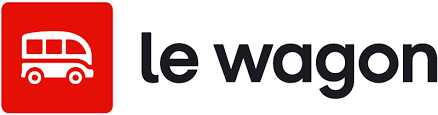

In [96]:
#To connect the notebook to our folder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing libraries

In [97]:
import numpy as np
import pandas as pd
import datetime

import plotly.express as px

### Importing dataset

## Context
In this exercise, you will be working with a dataset that contains information about the ecological impact of a food product. The objective is to gain a deeper understanding of how our food consumption can affect nature.

---
## Importing data

1- Import the data with pandas

2- Download and import Food_Production.csv to colab

In [98]:
df = pd.read_csv('/content/Food_Production.csv')


### Dataset Exploration

Let's explore the data

3- How many lines and columns the dataset has? Use the .shape method.

In [99]:
df.shape

(43, 23)

4- Use the .info() method to get summary of the columns.

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

**5- What information we can find about the dataset?**

In the dataset, we can find a variety of information about how our food consumption can impact nature. This includes data on factors such as the water requirements for producing one kilogram of a specific food type. This information is valuable for comparing different foods.

However, it's worth noting that there are some Null values present in our dataset. These missing values will need to be addressed during the feature engineering process.

6- Use .describe() method to get statical summary of the columns

In [101]:
df.describe()

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,33.000000,38.000000,...,26.000000,38.000000,33.000000,27.000000,33.000000,38.000000,27.000000,38.000000,26.000000,30.000000
mean,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,27.181547,46.141316,...,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
std,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,46.445959,82.808808,...,1441.981970,1296.999186,10.613575,19.427462,28.348693,78.490074,49.307339,56891.283046,89928.189299,16232.080209
min,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,...,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.214932,3.752500,...,373.573281,105.500000,0.628415,4.027439,1.312500,1.112500,5.088235,3325.075000,11018.401008,2969.124983
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,7.000000,11.460000,...,1083.327272,417.100000,1.351351,6.500000,2.976244,6.865000,7.936314,14533.050000,20917.213595,12605.256790
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,26.324324,45.840000,...,1832.386339,1340.375000,5.335135,14.983333,6.605405,14.917500,23.002381,35960.175000,70651.721023,28056.471593
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,...,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


**7- What are the first observations we can make about it? (missing values, NaNs, nulls, type)**


In [102]:
df.isnull().sum()

# type: int64

Food product                                                                0
Land use change                                                             0
Animal Feed                                                                 0
Farm                                                                        0
Processing                                                                  0
Transport                                                                   0
Packging                                                                    0
Retail                                                                      0
Total_emissions                                                             0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater withdrawals per 1000kcal (liters per 1000kcal)       

8- What are the names of the columns of the dataset?

**Do you think something should be done about it?**

The column names in the dataset exhibit inconsistencies, such as the usage of underscores, spaces, missing letters, and excessively long names. It would be beneficial to standardize and normalize the column names to ensure consistency and improve readability.

### Feature Engineering

Now that we have explored the dataset we are going to clean it up so we can work with it!

##### 9- Missing values

To replace the missing values, we can proceed with the following choices:

*   Note our discoveries and determine if we can have NaN values in the dataset
*   Replace missing values with a specific value or simply delete them
*   Use wisely the missing data to have as much information as possible


In our case, if we decided to delete all the rows that contains NaN value we'll lose too much information in our dataset. **Instead we'll keep all our information and make sure that we only gives non NaN values to our Data Vizualisation.**

Let's see how! Our goal is to only keep the rows that have no NaN values in the column "TestColumn". To do so, we'll simply select the rows without NaN value by using a mask like this :

```
dataset_to_use_in_viz = dataset[~np.isnan(dataset["TestColumn"])]
```
And now we can use dataset_to_use_in_viz freely!


In [103]:
dataset_to_use_in_viz = df[df.notna().all(axis=1)]

In [104]:
dataset_to_use_in_viz

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.923080,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.774650,13449.891480
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.754098,...,347.647059,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.176470,3762.568306
11,Nuts,-2.1,0.0,2.1,0.0,0.1,0.1,0.0,0.2,3.113821,...,2531.414574,4133.8,0.069919,0.263319,2.107317,12.96,7.936314,229889.8,140777.587300,37380.455280
12,Groundnuts,0.4,0.0,1.4,0.4,0.1,0.1,0.0,2.4,2.437931,...,707.524828,1852.3,0.556897,1.233766,1.570690,9.11,3.479756,61797.9,23605.003820,10654.810340
20,Tomatoes,0.4,0.0,0.7,0.0,0.2,0.1,0.0,1.4,39.526316,...,3361.818182,369.8,11.000000,19.000000,4.210526,0.80,7.272727,5335.7,48506.363640,28082.631580
21,Onions & Leeks,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,8.756757,...,110.000000,14.3,1.351351,3.846154,1.054054,0.39,3.000000,932.0,7169.230769,2518.918919
22,Root Vegetables,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.351351,...,284.000000,28.4,1.162162,4.300000,0.891892,0.33,3.300000,929.2,9292.000000,2511.351351
23,Brassicas,0.0,0.0,0.3,0.0,0.1,0.0,0.0,0.4,29.470588,...,1085.454545,119.4,3.000000,4.636364,3.235294,0.55,5.000000,8455.1,76864.545450,49735.882350
25,Citrus Fruit,-0.1,0.0,0.3,0.0,0.1,0.0,0.0,0.3,7.000000,...,1378.333333,82.7,1.218750,6.500000,2.687500,0.86,14.333333,4662.7,77711.666670,14570.937500


##### 10- Negatives Values

Lately, many plantations/activities have been replaced by grasslands, abandoned pastures or just changed.

To replace the negatives values we can proceed with following choices:

*   Note our discoveries and provide scientific evidence regarding why they can be relevant
*   Replace all negative values with a chosen value, or delete them

To find out which are the negative values that belong to the numeric types we are going to use the method `select_dtypes`, which allows us to select only the data that belongs to the type we specify. For more information use this [link](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html).

**11- Write a code that will give you the number of negative values in the dataset.**

In [105]:
ng = dataset_to_use_in_viz.select_dtypes(include='number')
nb_ng = (ng < 0).sum()
nb_ng

Land use change                                                            2
Animal Feed                                                                0
Farm                                                                       0
Processing                                                                 0
Transport                                                                  0
Packging                                                                   0
Retail                                                                     0
Total_emissions                                                            0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   0
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   0
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      0
Freshwater withdrawals per 1000kcal (liters per 1000kcal)                  0
Freshwater withdrawals per 100g protein (liters per 100g protein)          0

**12- In which dataset are these negative value ?**



*   There are 2 negative value in column Land use change



**13- Replace the negative values with 0 and make sure that you do not have any negative values anymore.**

In [106]:
# Replace negative and NaN values in "Land use change" column with 0
dataset_to_use_in_viz['Land use change'] = dataset_to_use_in_viz['Land use change'].apply(lambda x: max(0, x))


<ipython-input-106-50d3ba9f1625>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
dataset_to_use_in_viz['Land use change']

3      0.0
4      0.0
5      0.0
11     0.0
12     0.4
20     0.4
21     0.0
22     0.0
23     0.0
25     0.0
26     0.0
27     0.0
28     0.0
31     3.7
32    14.3
33    16.3
34     0.9
35     0.5
36     1.5
37     2.5
38     0.5
39     4.5
40     0.7
41     0.5
Name: Land use change, dtype: float64

The column names in the dataset are quite inconsistent (some use underscores, other spaces, there are letters missing, etc.) and some columns have long names.

14- Rename all the columns with n uniform format. To do that, check the columns actual names by using the method `.columns` and then rename them by using `.rename()`


In [108]:
dataset_to_use_in_viz.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

In [109]:
# Get the current column names
current_column_names = dataset_to_use_in_viz.columns

# Define a function to convert column names to uniform format
def convert_to_uniform(name):
    # Remove special characters and spaces, and convert to lowercase
    return name.replace(' ', '_').replace('-', '_').replace('(', '').replace(')', '').lower()

# Create a dictionary to store the new column names
new_column_names = {col: convert_to_uniform(col) for col in current_column_names}

# Rename columns using the dictionary
dataset_to_use_in_viz.rename(columns=new_column_names, inplace=True)

# Display the updated column names
dataset_to_use_in_viz.columns


<ipython-input-109-a911ce4bfeef>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Index(['food_product', 'land_use_change', 'animal_feed', 'farm', 'processing',
       'transport', 'packging', 'retail', 'total_emissions',
       'eutrophying_emissions_per_1000kcal_gpo₄eq_per_1000kcal',
       'eutrophying_emissions_per_kilogram_gpo₄eq_per_kilogram',
       'eutrophying_emissions_per_100g_protein_gpo₄eq_per_100_grams_protein',
       'freshwater_withdrawals_per_1000kcal_liters_per_1000kcal',
       'freshwater_withdrawals_per_100g_protein_liters_per_100g_protein',
       'freshwater_withdrawals_per_kilogram_liters_per_kilogram',
       'greenhouse_gas_emissions_per_1000kcal_kgco₂eq_per_1000kcal',
       'greenhouse_gas_emissions_per_100g_protein_kgco₂eq_per_100g_protein',
       'land_use_per_1000kcal_m²_per_1000kcal',
       'land_use_per_kilogram_m²_per_kilogram',
       'land_use_per_100g_protein_m²_per_100g_protein',
       'scarcity_weighted_water_use_per_kilogram_liters_per_kilogram',
       'scarcity_weighted_water_use_per_100g_protein_liters_per_100g_protein'

#### Data Transformation

##### **Create a "Category" column to cluster the different types of food products**

**14- Given the following lists, write some code that will assign the correct category to each products.**



```
Grains = ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"]
Nuts = ['Nuts', 'Groundnuts']
Vegetables = ["Potatoes", "Cassava", 'Other Pulses',"Peas",'Tomatoes', 'Onions & Leeks','Root Vegetables',"Brassicas",'Other Vegetables']
Fruits = ['Citrus Fruit', 'Bananas','Apples', 'Berries & Grapes', 'Other Fruit']
Sugars = ['Cane Sugar', 'Beet Sugar',]
Oils = ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil']
Dairy = ["Soymilk",'Milk', 'Cheese']
Animal_Prod = ['Beef (beef herd)', 'Beef (dairy herd)','Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)']
Other = ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
```



In [110]:
# Define the lists of categories and their corresponding food products
categories = {
    "Grains": ["Wheat & Rye (Bread)", "Maize (Meal)", "Oatmeal", "Barley (Beer)", "Rice"],
    "Nuts": ['Nuts', 'Groundnuts'],
    "Vegetables": ["Potatoes", "Cassava", 'Other Pulses',"Peas",'Tomatoes', 'Onions & Leeks','Root Vegetables',"Brassicas",'Other Vegetables'],
    "Fruits": ['Citrus Fruit', 'Bananas','Apples', 'Berries & Grapes', 'Other Fruit'],
    "Sugars": ['Cane Sugar', 'Beet Sugar'],
    "Oils": ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    "Dairy": ["Soymilk",'Milk', 'Cheese'],
    "Animal_Prod": ['Beef (beef herd)', 'Beef (dairy herd)','Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'],
    "Other": ["Tofu", "Coffee", "Dark Chocolate", "Wine"]
}

# Create a "Category" column by mapping food products to categories
dataset_to_use_in_viz['Category'] = dataset_to_use_in_viz['food_product'].apply(
    lambda product: next((category for category, products in categories.items() if product in products), "Unknown")
)

# Display the updated DataFrame with the "Category" column
dataset_to_use_in_viz.head()


<ipython-input-110-470309f47d49>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,food_product,land_use_change,animal_feed,farm,processing,transport,packging,retail,total_emissions,eutrophying_emissions_per_1000kcal_gpo₄eq_per_1000kcal,...,freshwater_withdrawals_per_kilogram_liters_per_kilogram,greenhouse_gas_emissions_per_1000kcal_kgco₂eq_per_1000kcal,greenhouse_gas_emissions_per_100g_protein_kgco₂eq_per_100g_protein,land_use_per_1000kcal_m²_per_1000kcal,land_use_per_kilogram_m²_per_kilogram,land_use_per_100g_protein_m²_per_100g_protein,scarcity_weighted_water_use_per_kilogram_liters_per_kilogram,scarcity_weighted_water_use_per_100g_protein_liters_per_100g_protein,scarcity_weighted_water_use_per_1000kcal_liters_per_1000_kilocalories,Category
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.92308,7162.104461,Grains
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.77465,13449.891480,Grains
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.754098,...,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.17647,3762.568306,Vegetables
11,Nuts,0.0,0.0,2.1,0.0,0.1,0.1,0.0,0.2,3.113821,...,4133.8,0.069919,0.263319,2.107317,12.96,7.936314,229889.8,140777.58730,37380.455280,Nuts
12,Groundnuts,0.4,0.0,1.4,0.4,0.1,0.1,0.0,2.4,2.437931,...,1852.3,0.556897,1.233766,1.570690,9.11,3.479756,61797.9,23605.00382,10654.810340,Nuts


**15- Check how many values you have for each category.**

In [111]:
dataset_to_use_in_viz.groupby('Category')['total_emissions'].count()

Category
Animal_Prod    7
Dairy          2
Fruits         4
Grains         2
Nuts           2
Other          2
Vegetables     5
Name: total_emissions, dtype: int64

### Data Visualization

#### Greenhouse emissions

**16- Plot the Average Total emission by category using scatter plot**

In [112]:
cat_emi_avg = dataset_to_use_in_viz.groupby('Category')['total_emissions'].mean()
px.scatter(
    cat_emi_avg)

#### Total emissions by food product

**17- Plot the Total emission by food product using a bar plot**


In [113]:
total_emission_by_food = dataset_to_use_in_viz.groupby('food_product')['total_emissions'].sum()
print(total_emission_by_food)
px.bar(
    total_emission_by_food,
    color = total_emission_by_food
)

food_product
Apples                0.3
Bananas               0.8
Beef (beef herd)     59.6
Beef (dairy herd)    21.1
Berries & Grapes      1.1
Brassicas             0.4
Cheese               21.2
Citrus Fruit          0.3
Coffee               16.5
Dark Chocolate       18.7
Eggs                  4.5
Fish (farmed)         5.1
Groundnuts            2.4
Lamb & Mutton        24.5
Milk                  2.8
Nuts                  0.2
Oatmeal               1.6
Onions & Leeks        0.3
Pig Meat              7.2
Potatoes              0.3
Poultry Meat          6.1
Rice                  4.0
Root Vegetables       0.3
Tomatoes              1.4
Name: total_emissions, dtype: float64


**18- Which types of food have more negative impact on the environment? What conclusions can youd draw?**




*   Meat: Beef, Lamb & Mutton, Pig Meat
*   Cheese, Dark Chocolate, Coffee



#### Total emissions by product category

**19- Plot the SUM of Total emission by Category using a bar plot**



In [114]:
total_by_category = dataset_to_use_in_viz.groupby('Category')['total_emissions'].sum()
px.bar(
    total_by_category
)

**20- Plot the SUM of Total emission by Category using a pie chart**


In [115]:
total_by_category

Category
Animal_Prod    128.1
Dairy           24.0
Fruits           2.5
Grains           5.6
Nuts             2.6
Other           35.2
Vegetables       2.7
Name: total_emissions, dtype: float64

In [116]:
average_emissions_by_category = dataset_to_use_in_viz.groupby('Category')['total_emissions'].sum().reset_index()

px.pie(average_emissions_by_category,
       title='Total Emissions by Category')


#### 21- Which stage of food production contributes more to greenhouse gas emission?

**22- Plot the Total emission by supply chain using a bar chart**

Stages of supply chain:
1. Land usage
2. Farm
3. Animal Feed
4. Processing
5. Transport
6. Retail
7. Packaging

In [125]:
# Calculate the total emissions for each stage of the supply chain
supply_chain = ['land_use_change', 'farm', 'animal_feed', 'processing', 'transport', 'retail', 'packging']
total_emissions_by_stage = dataset_to_use_in_viz[supply_chain].sum()

px.bar(
    x=supply_chain,
    y=total_emissions_by_stage,
    color = total_emissions_by_stage,
    labels={'x': 'Supply Chain Stage', 'y': 'Total Emissions'},
    title='Total Emissions by Supply Chain Stage'
)


**23- Plot the Total emissions by Food Product using a bar plot. Add the Supply chain as color.**


In [ ]:
total_emission_by_food = dataset_to_use_in_viz.groupby('food_product')['total_emissions'].sum()
tot_emi_supply_chain = dataset_to_use_in_viz.groupby('food_product')['land_use_change', 'farm', 'animal_feed', 'processing', 'transport', 'retail', 'packging'].sum()

total_emission_by_food, tot_emi_supply_chain


In [129]:
px.bar(tot_emi_supply_chain)

**24- Plot the Total emissions by Food Product using a bar plot. Add the Category as color.**

In [147]:
px.bar(
    dataset_to_use_in_viz,
    x= 'food_product',
    y='total_emissions',
    color = 'Category'
)

**25- How can we promote sustainable and nutritious food production?**



In [148]:
dataset_to_use_in_viz.columns

Index(['food_product', 'land_use_change', 'animal_feed', 'farm', 'processing',
       'transport', 'packging', 'retail', 'total_emissions',
       'eutrophying_emissions_per_1000kcal_gpo₄eq_per_1000kcal',
       'eutrophying_emissions_per_kilogram_gpo₄eq_per_kilogram',
       'eutrophying_emissions_per_100g_protein_gpo₄eq_per_100_grams_protein',
       'freshwater_withdrawals_per_1000kcal_liters_per_1000kcal',
       'freshwater_withdrawals_per_100g_protein_liters_per_100g_protein',
       'freshwater_withdrawals_per_kilogram_liters_per_kilogram',
       'greenhouse_gas_emissions_per_1000kcal_kgco₂eq_per_1000kcal',
       'greenhouse_gas_emissions_per_100g_protein_kgco₂eq_per_100g_protein',
       'land_use_per_1000kcal_m²_per_1000kcal',
       'land_use_per_kilogram_m²_per_kilogram',
       'land_use_per_100g_protein_m²_per_100g_protein',
       'scarcity_weighted_water_use_per_kilogram_liters_per_kilogram',
       'scarcity_weighted_water_use_per_100g_protein_liters_per_100g_protein'

**26- Plot a bar chart that displays the land used to produce 1 Kg of Food**

Be careful here! You might face some issues while working with NaN values. Make sure to follow the steps explained earlier!

In [165]:
fig = px.bar(
    dataset_to_use_in_viz,
    x='food_product',
    y='land_use_per_kilogram_m²_per_kilogram',
    color = 'land_use_per_kilogram_m²_per_kilogram',
)

fig.update_layout(
    xaxis_title = 'Food Product',
    yaxis_title ="land used to produce 1 Kg of Food",
    coloraxis_colorbar_title = "Land used to produce 1 Kg of Food")
fig.show()

**27- Plot a bar chart that displays the land used to produce 1000kcal for every food product**


In [166]:
fig = px.bar(
    dataset_to_use_in_viz,
    x='food_product',
    y='land_use_per_1000kcal_m²_per_1000kcal',
    color = 'land_use_per_1000kcal_m²_per_1000kcal',
)

fig.update_layout(
    xaxis_title = 'Food Product',
    yaxis_title ='land use per 1000kcal m² per_1000kcal',
    coloraxis_colorbar_title = 'Land use / 1000kcal m² per 1000kcal')
fig.show()

**28- Plot a bar chart that displays the water used to produce 1000kcal for every food product**


In [167]:
fig = px.bar(
    dataset_to_use_in_viz,
    x='food_product',
    y='freshwater_withdrawals_per_1000kcal_liters_per_1000kcal',
    color = 'freshwater_withdrawals_per_1000kcal_liters_per_1000kcal',
)

fig.update_layout(
    xaxis_title = 'Food Product',
    yaxis_title ='Water used to produce 1000kcal',
    coloraxis_colorbar_title ='Water used to produce 1000kcal')
fig.show()

**29- Plot a bar chart that displays the water used to produce 1Kg for every food product**

In [168]:
fig = px.bar(
    dataset_to_use_in_viz,
    x='food_product',
    y='freshwater_withdrawals_per_kilogram_liters_per_kilogram',
    color = 'freshwater_withdrawals_per_kilogram_liters_per_kilogram',
)

fig.update_layout(
    xaxis_title = 'Food Product',
    yaxis_title ='Water used to produce 1kg',
    coloraxis_colorbar_title ='Water used to produce 1kg')
fig.show()

#### Heatmap to check the relation among different attributes of foods

### Conclusion

**30- What can be the strategy to reduce greenhouse gas emissions regarding our food consumption?**


